In [92]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.datasets.boston_housing import load_data
import numpy as np

### [1] 데이터 로딩

In [93]:
(x_train, y_train), (x_test, y_test) = load_data()

In [94]:
x_train.shape

(404, 13)

In [95]:
x_train[:1], y_train[0]

(array([[  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
          91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
          18.72   ]]),
 15.2)

### [2] NN Nodel 실습  
---  
- (1) 모델 구상
- (2) 모델 생성
- (3) 학습
- (4) 평가
- (5) 테스트

(1) 입력 데이터와 출력 데이터가 몇개여야 하는지 부터 파악(feature와 회귀/분류)  
(2) 학습 방법(회귀/분류) 파악

#### [2] - 1 모델구상  
입력 데이터 : 13 feature  
출력 데이터 : 1 (Houseprices)

In [96]:
model = Sequential(name='Boston')

In [97]:
model.add(Input(shape = (13, ), name = 'input'))
model.add(Dense(13, activation ='relu', name = 'hidden1'))
# 과적합을 해결하기위 해어서 지정된 비율만큼 node를 비활성화 하는 Dropout() 사용
model.add(Dropout(0.5))
model.add(Dense(1, activation ='linear', name = 'output'))

In [98]:
# 모델 구성 확인
model.summary()

Model: "Boston"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 13)                182       
                                                                 
 dropout_2 (Dropout)         (None, 13)                0         
                                                                 
 output (Dense)              (None, 1)                 14        
                                                                 
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


#### [2] - 2 모델 생성  
---  
- Sequentail 클래스의 compile 메서드
- 모델이 동작하기 위해서 필요한 설정
    * 오차, 계산 함수 설정       : loss
    * W, B 최적화 방식 설정      : optimizer
    * 모델의 성능 측정 항목 설정 : metrics
- 파라미터 값들
     * str 타입으로 입력 가능
     * 객체 타입으로 입력 가능

**오차 계산**  
    * 회귀 : mae, mse, rmse  
    * 분류 : crossentropy  
        - 이진분류 : binary_crossentropy  
        - 다중분류 : categorical_crossentropy           (타겟이 OHE된 경우)  
                     sparse_categorical_crossentropy    (타겟이 OHE되지 않은 경우)

**최적화**
- 기본 : rmsprop
- adam, momonent,... 최적화 클래스 이름 문자열 입력

**성능 평가**
- 기본 : loss
- 클래스 이름 문자열 입력

In [99]:
model.compile(loss = 'mae', optimizer = 'adam', metrics = ['acc', 'mae'])

#### [2] - 3 학습
---  
- fit() 메서드
    * 파라미터
    * 반환값 => history 객체

In [100]:
# 검증 데이터에 대한 loss 값이 3번 연속 개선되지 않으면 학습 주이
from tensorflow.keras.callbacks import EarlyStopping

stopCb = EarlyStopping(monitor = 'val_loss', patience = 3)

In [101]:
# epochs : 학습 횟수, batch_size : 학습량 크기
# validation_split : 학습 데이터의 일부를 검증용으로 분리
# validation_data : 테스트 데이터, 테스트 타겟
result = model.fit(x_train, y_train, epochs = 1000, batch_size=10, validation_data = (x_test, y_test), callbacks=[stopCb])

Epoch 1/1000
41/41 [==============================] - 1s 6ms/step - loss: 81.7104 - acc: 0.0000e+00 - mae: 81.7104 - val_loss: 14.8690 - val_acc: 0.0000e+00 - val_mae: 14.8690
Epoch 2/1000
41/41 [==============================] - 0s 2ms/step - loss: 57.5053 - acc: 0.0000e+00 - mae: 57.5053 - val_loss: 11.8348 - val_acc: 0.0000e+00 - val_mae: 11.8348
Epoch 3/1000
41/41 [==============================] - 0s 2ms/step - loss: 46.8937 - acc: 0.0000e+00 - mae: 46.8937 - val_loss: 10.1347 - val_acc: 0.0000e+00 - val_mae: 10.1347
Epoch 4/1000
41/41 [==============================] - 0s 2ms/step - loss: 34.1447 - acc: 0.0000e+00 - mae: 34.1447 - val_loss: 10.7032 - val_acc: 0.0000e+00 - val_mae: 10.7032
Epoch 5/1000
41/41 [==============================] - 0s 2ms/step - loss: 24.3125 - acc: 0.0000e+00 - mae: 24.3125 - val_loss: 7.9096 - val_acc: 0.0000e+00 - val_mae: 7.9096
Epoch 6/1000
41/41 [==============================] - 0s 2ms/step - loss: 20.4985 - acc: 0.0000e+00 - mae: 20.4985 - val_l

In [102]:
# 학습 후 학습 결과 체크
type(result)

keras.callbacks.History

In [103]:
result.params

{'verbose': 1, 'epochs': 1000, 'steps': 41}

In [104]:
result.history.keys()

dict_keys(['loss', 'acc', 'mae', 'val_loss', 'val_acc', 'val_mae'])

In [105]:
result.history['loss']

[81.71038818359375,
 57.50526428222656,
 46.89366912841797,
 34.14470672607422,
 24.312501907348633,
 20.498456954956055,
 16.101917266845703,
 13.587288856506348,
 12.881194114685059,
 12.188815116882324,
 10.577581405639648,
 11.208065032958984,
 10.363194465637207]

In [106]:
result.history['acc']

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

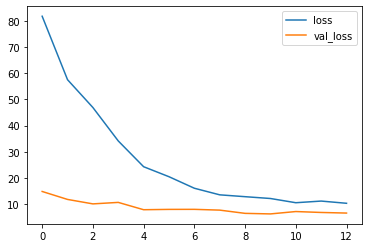

In [107]:
### 시각화
import matplotlib.pyplot as plt
plt.plot(result.epoch, result.history['loss'], label='loss')
plt.plot(result.epoch, result.history['val_loss'], label='val_loss')
plt.legend()

#### [2] - 4 모델 평가
- evaluate(test_data, test_target)
    * loss, metrics에서의 성능 지표값

In [108]:
eRet = model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 6.6315 - acc: 0.0000e+00 - mae: 6.6315


In [109]:
eRet

[6.631509780883789, 0.0, 6.631509780883789]

#### [2] - 5 예측

In [110]:
model.predict(x_train[:1])

1/1 [==============================] - 0s 52ms/step


array([[20.663084]], dtype=float32)

In [111]:
y_train[0]

15.2

### [3] 전처리

#### [3] - 1 전처리
- 특성 전처리
    * 수치 데이터 : 값의 범위
    * 문자 데이터 : 수치화

In [112]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [113]:
scaler = StandardScaler()

In [114]:
scaler.fit(x_train)

StandardScaler()

In [115]:
scaler.mean_

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [116]:
x_train_scaler = scaler.transform(x_train)